In [20]:
import datetime

In [21]:
import nltk
import string

In [22]:
import re

In [23]:
import pickle

In [24]:
import pandas as pd
import numpy as np

In [25]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [26]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance

In [27]:
from collections import Counter

In [31]:
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

In [65]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# dataset

In [32]:
data = open('peer_reviews_raw.txt', "r")

In [33]:
with open('peer_reviews_raw.txt') as data:
    my_reviews = list(data)

In [34]:
len(my_reviews)

30

# EDA

In [35]:
my_reviews[0]

'David, is probably the best team mate I worked with this week. His technical knowledge/ coding skills good, but his ability to work within a team to find a solution is exceptional.\n'

# remove stop words

# stemming/lemmatization

In [36]:
snowball = SnowballStemmer('english')
wordnet = WordNetLemmatizer()

In [37]:
# %%time
# def snowball_tokenize(doc):
#     snowball = SnowballStemmer('english')
#     return [snowball.stem(word) for word in word_tokenize(doc.lower())]

In [38]:
%%time
def wordnet_tokenize(doc):
    wordnet = WordNetLemmatizer()
    return  [wordnet.lemmatize(word) for word in word_tokenize(doc.lower())]

# vectorizer

### count vectorizer

In [117]:
lda_stop_words = ['david', 'he', 'is','we', 'him', 'and','to','with','the']

In [126]:
num_features = 1000
# LDA can only uses raw term counts
tf_vectorizer = CountVectorizer(stop_words=lda_stop_words, ngram_range=(2, 4))
tf = tf_vectorizer.fit_transform(my_reviews)

In [127]:
tf_feature_names = tf_vectorizer.get_feature_names() #theses are the words in our bag of words

In [128]:
num_topics = 3

# Run LDA
lda = LatentDirichletAllocation(n_components=num_topics, max_iter=5, learning_method='online',random_state=0, n_jobs=-1)
lda.fit(tf)

LatentDirichletAllocation(learning_method='online', max_iter=5, n_components=3,
                          n_jobs=-1, random_state=0)

In [129]:
def display_topics(model, feature_names, num_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic %d:" % (topic_idx))
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-num_top_words - 1:-1]]))

num_top_words = 10
display_topics(lda, tf_feature_names, num_top_words)

Topic 0:
very good at working through good at worked together fun work very good stats week seems understands problem discusses it same things can really relate
Topic 1:
willing ask ask questions up for all find solution exceptional team mate worked enjoyed working betts enjoy when on team all future assignments case would like pair when on
Topic 2:
great work like working very similar will make other lot what you great handle on material addition any group getter that what you skill levels


In [130]:
tf_feature_names

['ability work',
 'ability work within',
 'ability work within team',
 'about his',
 'about his willingness',
 'about his willingness think',
 'about problems',
 'about problems strategies',
 'about problems strategies before',
 'about something',
 'about what',
 'about what re',
 'about what re doing',
 'addition any',
 'addition any group',
 'all future',
 'all future assignments',
 'all future assignments case',
 'also has',
 'also has great',
 'also has great attitude',
 'also never',
 'also never quits',
 'also never quits on',
 'always fun',
 'always fun work',
 'always fun work smart',
 'always like',
 'always like working',
 'always like working will',
 'always open',
 'always open dialogue',
 'always open dialogue which',
 'always pleasure',
 'always pleasure working',
 'always pleasure working very',
 'always willing',
 'always willing ask',
 'always willing ask questions',
 'am stressed',
 'am stressed about',
 'am stressed about something',
 'another individual',
 'another 

# WORDNET tfidf

In [39]:
import string

In [40]:
# nytimes_quotes = "”“"
# nytimes_punctuation = "—’"

In [41]:
#setb = ['see', 'all', 'much', 'if', 'many', 'former', 'chief', 'spokesman', 'said']

In [42]:
#alphabet = ['a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y','z']

In [43]:
#stop_words = alphabet  + setb

In [67]:
# %%time
# #create vectorizer

# tf_vectorizer = TfidfVectorizer(#input='content', 
# #                 encoding='utf-8', 
# #                 decode_error='strict', 
#                  strip_accents='ascii', 
#                  lowercase=True, 
# #                 preprocessor=functions.punc_strip, 
# #                 tokenizer=functions.wordnet_tokenize, 
# #                 analyzer='word', 
# #                 stop_words=stop_words,
# #                 token_pattern='(?u)\b\w\w+\b', 
# #                 ngram_range=(2, 2), 
# #                  max_df=0.9, 
# #                  min_df=0.1, 
# #                 max_features=None, 
# #                 vocabulary=None, 
# #                 binary=False, 
# #                 dtype=<class 'numpy.float64'>, 
# #                 norm='l2', 
# #                 use_idf=True, 
# #                 smooth_idf=True, 
# #                 sublinear_tf=False
# )

In [62]:
%%time

tf_vectorizer = tf_vectorizer.fit(my_reviews)

CPU times: user 2.52 ms, sys: 608 µs, total: 3.13 ms
Wall time: 2.61 ms


In [63]:
tf_feature_names = tf_vectorizer.get_feature_names() #theses are the words in our bag of words

In [64]:
tf_feature_names

['ability',
 'about',
 'addition',
 'all',
 'also',
 'always',
 'am',
 'and',
 'another',
 'any',
 'anyone',
 'appreciate',
 'approach',
 'approaches',
 'are',
 'as',
 'ask',
 'asking',
 'assignments',
 'at',
 'attitude',
 'back',
 'be',
 'because',
 'been',
 'before',
 'best',
 'better',
 'betts',
 'both',
 'but',
 'by',
 'calming',
 'can',
 'case',
 'challenging',
 'class',
 'clearly',
 'coding',
 'collaborative',
 'coming',
 'complete',
 'concepts',
 'conceptual',
 'confusing',
 'continuously',
 'conversations',
 'could',
 'course',
 'covered',
 'critically',
 'critique',
 'cumulatively',
 'data',
 'dave',
 'david',
 'day',
 'definitely',
 'demeanor',
 'dialogue',
 'didn',
 'different',
 'direct',
 'discusses',
 'discussion',
 'docker',
 'doing',
 'drive',
 'drives',
 'each',
 'easy',
 'effort',
 'enjoy',
 'enjoyed',
 'even',
 'every',
 'everyone',
 'everything',
 'exceptional',
 'explains',
 'face',
 'far',
 'feel',
 'figure',
 'find',
 'first',
 'focused',
 'for',
 'from',
 'front

# count vectorizer

In [186]:
# count_vectorizer = CountVectorizer(strip_accents='None',
#                                    lowercase=True,
#                                    tokenizer=snowball_tokenize,
#                                    stop_words='english',
#                                    max_features=None)

2021-01-21 11:27:10.711865
CPU times: user 5.4 s, sys: 1.04 s, total: 6.44 s
Wall time: 6.21 s


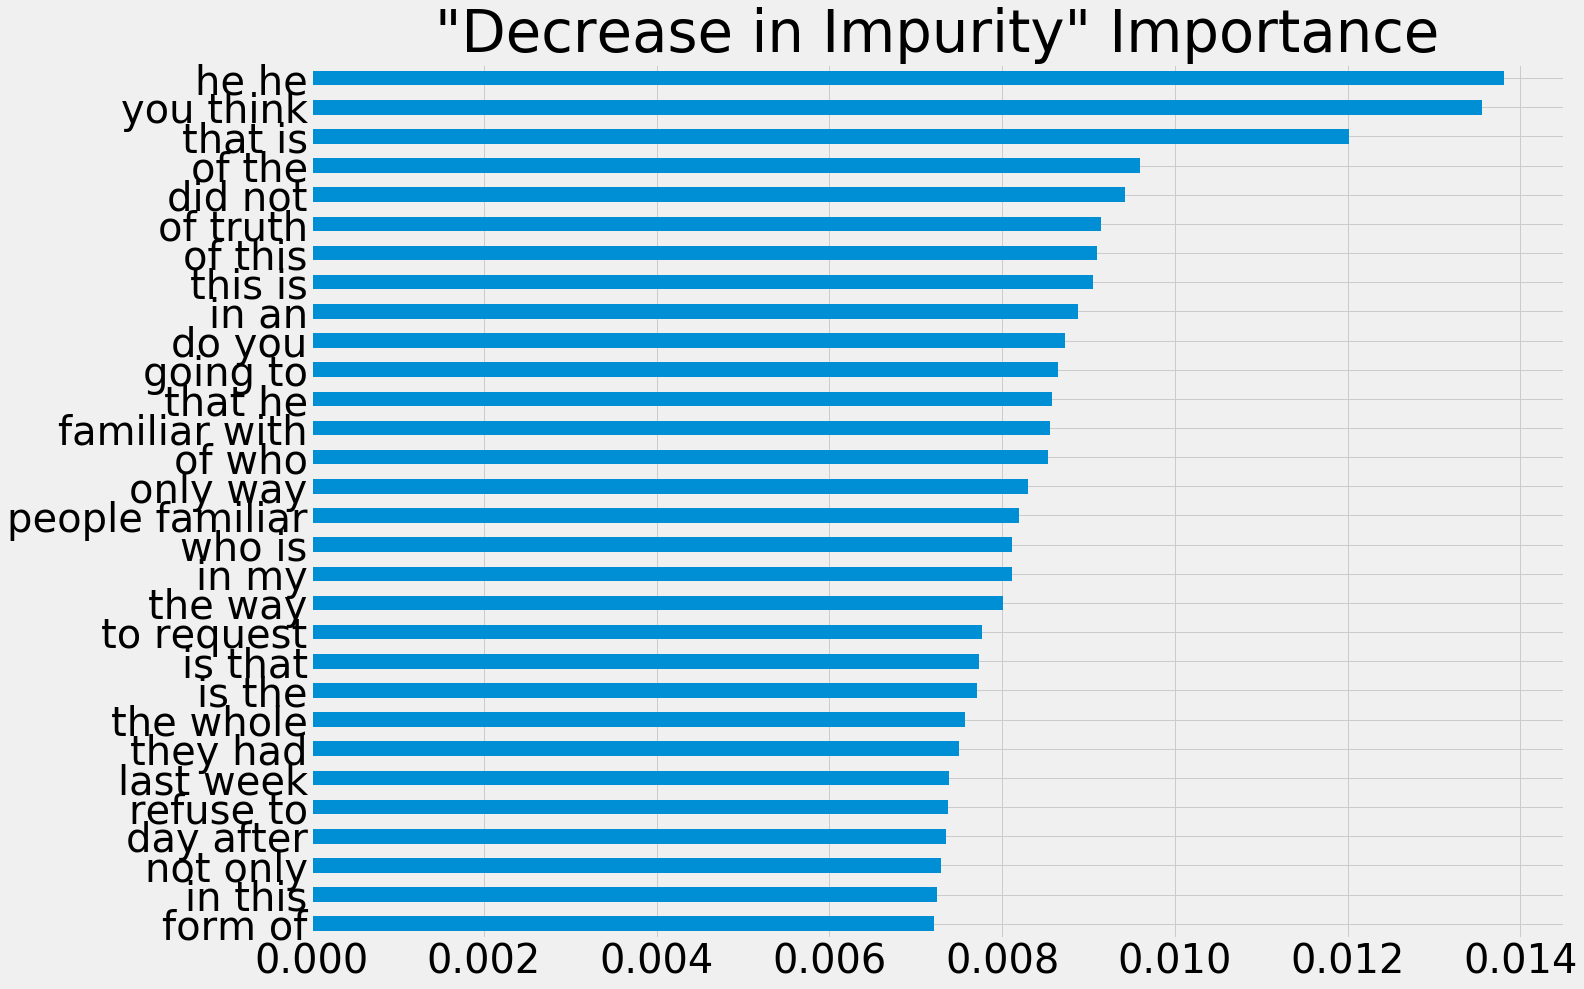

In [195]:
%%time
print(datetime.datetime.now())

feat_names = vectorizer.get_feature_names()
feature_import = rf_clf.feature_importances_

feat_scores = pd.Series(feature_import, index=feat_names)
feat_scores = feat_scores.sort_values()
ax = feat_scores[-30:].plot(kind='barh', figsize=(20,15))
ax.set_title('"Decrease in Impurity" Importance')
#ax.set_xlabel('Average contribution to the reduction in variance')
plt.rcParams.update({'font.size': 40})
plt.savefig('img/feature_imporance.png');

In [196]:
feat_scores[-100:].index

Index(['company wa', 'the committee', 'realize that', 'tariff of', 'agency ha',
       'he the', 'should be', 'director of', 'now is', 'criticism that',
       'asked to', 'me to', 'chairman of', 'after he', 'staff to', 'talk with',
       'president she', 'at time', 'apply to', 'and ha', 'happening in',
       'use of', 'letter on', 'democracy to', 'like an', 'of anonymity',
       'hearing on', 'it about', 'whether to', 'the percentage', 'his concern',
       'the discussion', 'be fair', 'worse than', 'current and', 'this one',
       'come out', 'month to', 'dozen of', 'not going', 'wont be',
       'president is', 'the proposal', 'no one', '2016 presidential',
       'back to', 'the for', 'thing are', 'on night', 'are so',
       'the administrator', 'believe that', 'this article', 'the statement',
       'senior fellow', 'wrote on', 'you dont', 'discus the', 'criticism from',
       'information about', 'included in', 'to believe', 'it would',
       'told the', 'briefed on', 'you

In [197]:
count_df = df[['text', 'type_of_material']]
oped = count_df[count_df['type_of_material'] == "Op-Ed"]
news = count_df[count_df['type_of_material'] == "News"]

In [198]:
print(oped.shape)
print(news.shape)

(3191, 2)
(14592, 2)


In [199]:
oped_string = oped.text.str.cat(sep = " ")
num_oped_string = len(oped_string)
print(num_oped_string)

14006924


In [200]:
news_string = news.text.str.cat(sep = " ")
num_news_string = len(news_string)
print(num_news_string)

71931567


# counting

In [208]:
top_feat = feat_scores[-100:].index

In [209]:
%%time
#count top words in oped_string
oped_list = [word for word in oped_string.split() if word in list(top_feat)]
oped_ed_counter = Counter(oped_list)
oped_ed_counter.items()

CPU times: user 16.6 s, sys: 58.9 ms, total: 16.6 s
Wall time: 16.7 s


dict_items([])

In [210]:
%%time
#count top words in news string
news_list = [word for word in news_string.split() if word  in list(top_feat)]
news_counter = Counter(news_list)
news_counter.items()

CPU times: user 1min 39s, sys: 948 ms, total: 1min 40s
Wall time: 1min 43s


dict_items([])

# merge dictionary

In [211]:
%%time
#merge keys and values together.
# merge_dic.val[0] = news
# merge_dic.val[1] = oped

merge_dic = {}
for key, oped_val in oped_ed_counter.items():
    news_val = news_counter.get(key)
    merged_values = (news_val, oped_val)
    merged_values_set = set(merged_values)
    merge_dic[key] = merged_values_set

CPU times: user 5 µs, sys: 1e+03 ns, total: 6 µs
Wall time: 8.11 µs


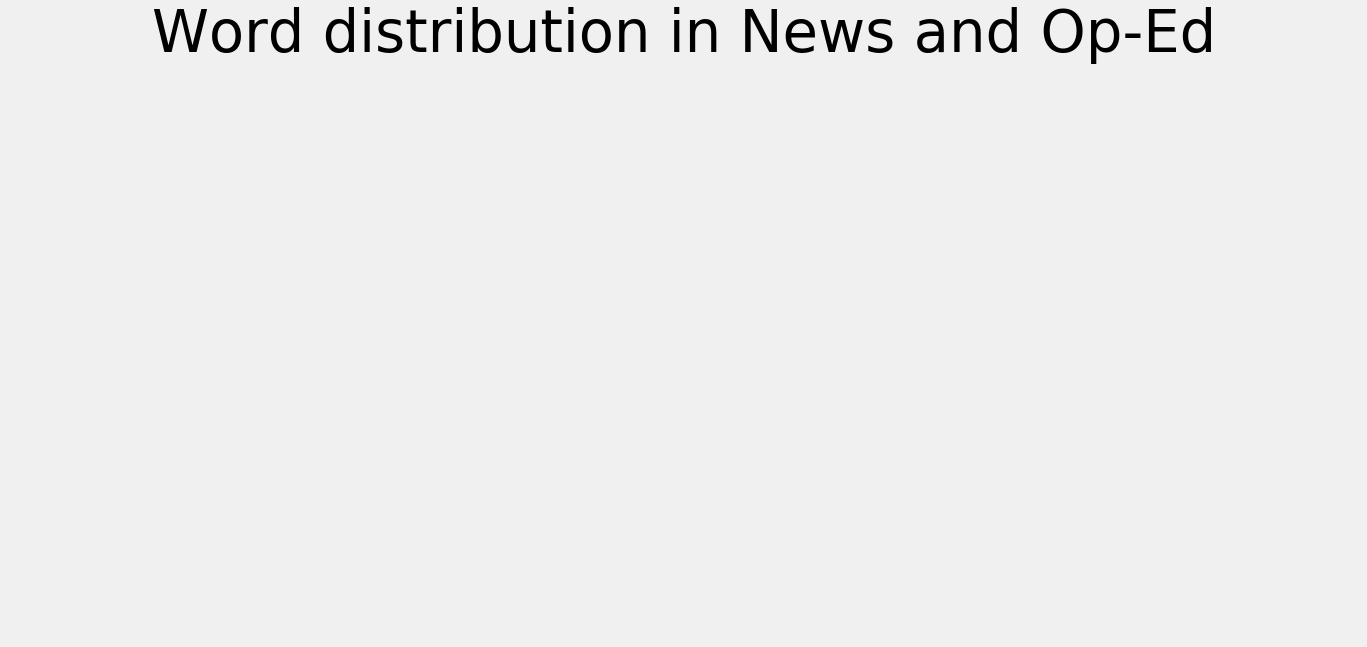

<Figure size 432x288 with 0 Axes>

In [212]:
#plot of word distributions
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

merge_dic = {}
for key, oped_val in oped_ed_counter.items():
    news_val = news_counter.get(key)
    merged_values = (news_val, oped_val)
    merge_dic[key] = merged_values

keys = []
news_counts = []
oped_counts = []
    
for k, v in merge_dic.items():
    keys.append(k)
    news_counts.append(v[0]/num_news_string)
    oped_counts.append(v[1]/num_oped_string)

x = np.arange(len(keys))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(20,10))
rects1 = ax.bar(x - width/2, news_counts, width, label='News')
rects2 = ax.bar(x + width/2, oped_counts, width, label='Op-Ed')


# Add some text for labels, title and custom x-axis tick labels, etc.
#ax.set_ylabel('Count')
ax.set_title('Word distribution in News and Op-Ed')
ax.set_xticks(x)
#ax.set_yscale('log')
# ax.set_xticklabels(keys)
# ax.legend()

plt.yticks([])
fig.tight_layout()
plt.xticks(rotation=45, fontsize=30)
plt.show()
plt.savefig('img/word_dist.png');

# news/oped most common 

In [213]:
# %%time
# oped_list_features = [word for word in oped_string.split() if word in list(top_15)]
# oped_ed_count_total = Counter(oped_list_features)

In [214]:
# %%time
# news_list_features = [word for word in news_string.split() if word in list(top_15)]
# news_counter_total = Counter(news_list_features)

In [215]:
%%time
#list of words that are more news_words and are more oped_words
# merge_dic.val[0] = news
# merge_dic.val[1] = oped

news_words = []
oped_words = []

for k, v in merge_dic.items():
    if v[0]/num_news_string > v[1]/num_oped_string:
        news_words.append(k)
    else:
        oped_words.append(k)

CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 7.87 µs


In [216]:
print(len(news_words))
print(len(oped_words))

0
0


In [217]:
#top News Words
news_words

[]

In [218]:
#top Op-Ed Words
oped_words

[]

In [219]:
print(num_oped_string)
print(num_news_string)

14006924
71931567


### permutation importance

In [220]:
# %%time
# print(datetime.datetime.now())
# r = permutation_importance(rf_clf, X_test.toarray(), y_test, n_repeats=30, random_state=0)

In [221]:
# for i in r.importances_mean.argsort()[::-1]:
#     if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
#         print(f"{feat_names[i]:<8}"
#               f"{r.importances_mean[i]:.3f}"
#               f" +/- {r.importances_std[i]:.3f}")

In [222]:
# for i in r.importances_mean.argsort()[::-1]:
#     if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
#         print(f"{feat_names[i]:<20}")
# #               f"{r.importances_mean[i]:.3f}"
# #               f" +/- {r.importances_std[i]:.3f}")

In [180]:
len(feat_names)

328

# make a plot

# min_df_plot

In [73]:
# %%time
# num_feat_min = []

# min_df = np.linspace(0.01,0.5,5)

# for val in min_df:
#     vectorizer_plot = TfidfVectorizer(preprocessor=punc_strip,
# #                 tokenizer=wordnet_tokenize,
#                 stop_words=alphabet,
# #                 max_df=0.95,
#                  min_df=val,
#                  max_features=None)
    
#     vectorizer_plot.fit(X)
    
#     features = vectorizer_plot.get_feature_names()
#     stop_word = vectorizer_plot.get_stop_words()

#     num_feat_min.append(len(features))

In [74]:
# learn_vect = TfidfVectorizer(preprocessor=punc_strip,
#                  tokenizer=wordnet_tokenize,
# #            stop_words=alphabet,
# #                max_df=0.95,
#              min_df=.2,
#              max_features=None)

# learn_vect.fit(X)

# min_df_features = learn_vect.get_feature_names()
# stop_word = learn_vect.get_stop_words()

In [75]:
# len(min_df_features)

In [76]:
# min_df_features

In [77]:
# %%time
# fig, ax = plt.subplots()
# ax.plot(min_df, num_feat_min);

# 

# max_features

In [78]:
# %%time
# TN = []
# FP = []
# FN = []
# TP = []

# num_feat = np.linspace(1000,50000,6)

# for val in num_feat:
#     vectorizer_plot = TfidfVectorizer(preprocessor=punc_strip,
# #                 tokenizer=wordnet_tokenize,
#                 stop_words=alphabet,
# #                 max_df=0.95,
# #                 min_df=val,
#                  max_features=int(val))

#     #test, train, split
#     X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=50)

#     X_train = vectorizer_plot.fit_transform(X_train)

#     X_test = vectorizer_plot.transform(X_test)
    
#     #X, y --> X_resampled, y_resampled
#     rus = RandomUnderSampler(random_state=0)
#     X_resampled, y_resampled = rus.fit_resample(X_train, y_train)
    
#     recall_rfc = RandomForestClassifier(max_depth=2, random_state=0)

#     rf_clf.fit(X_resampled, y_resampled)
#     y_pred = rf_clf.predict(X_test)
    
#     tn, fp, fn, tp = confusion_matrix(y_true = y_test, y_pred = y_pred).ravel()
#     a, r, p  = metrics_(tn, fp, fn, tp)
    
#     TN.append(tn)
#     FP.append(fp)
#     FN.append(fn)
#     TP.append(tp)
    
    
#     num_feat_min.append(len(features))

In [79]:
# for f in features:
#     model = RandomForestClassifier(max_features=f)
#     score = cross_val_score(model, X, y).mean()
#     print('A Random Forest Regressor with max features of: {} gets a score of {}'
#           .format(f,score))
#     scores.append(score)
    
# fig, ax = plt.subplots()
# ax.plot(features, scores)

In [80]:
# for f in features:
#     model = RandomForestClassifier(max_features=f)
#     score = cross_val_score(model, X, y).mean()
#     print('A Random Forest Regressor with max features of: {} gets a score of {}'
#           .format(f,score))
#     scores.append(score)

In [81]:
# #stacked bar graph

# video_sales_df = pd.read_excel("data.xlsx")

# regional_genre = video_sales_df.groupby(['Genre'],as_index=False)["NA_Sales","EU_Sales","JP_Sales"].sum()[:5]
# columns = ["NA_Sales","EU_Sales","JP_Sales"]

# # Normalization parameters
# normalize_min = 0.1
# normalize_max = 1

# # Normalize
# regional_genre[columns]= preprocessing.minmax_scale(regional_genre[columns], feature_range=(normalize_min, normalize_max))

# # Plot stacked bars
# plt.bar(regional_genre["Genre"], regional_genre["NA_Sales"], label="NA_Sales")
# plt.bar(regional_genre["Genre"], regional_genre["EU_Sales"], bottom=regional_genre["NA_Sales"], label="EU_Sales")
# plt.bar(regional_genre["Genre"], regional_genre["JP_Sales"], bottom=regional_genre["EU_Sales"]+regional_genre["NA_Sales"], label="JP_Sales")
# plt.legend()
# plt.ylabel("Normalized sales")
# plt.show()

# # Another solution for plot:

# plt.bar(columns, regional_genre.ix[0,1:], label="Action")
# bot = regional_genre.ix[0,1:]
# plt.bar(columns, regional_genre.ix[1,1:], bottom=bot, label="Adventure")
# bot += regional_genre.ix[1,1:]
# plt.bar(columns, regional_genre.ix[2,1:], bottom=bot, label="Fighting")
# bot += regional_genre.ix[2,1:]
# plt.bar(columns, regional_genre.ix[3,1:], bottom=bot, label="Misc")
# bot += regional_genre.ix[3,1:]
# plt.bar(columns, regional_genre.ix[4,1:], bottom=bot, label="Platform")